In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sys
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset files

In [2]:
file_list = os.listdir('../data/topology4/Ring/')
sorted(file_list)[:5]

['dataRing_10_10_4_16000_B.txt',
 'dataRing_10_10_4_16000_D.txt',
 'dataRing_10_10_4_16000_M.txt',
 'dataRing_10_10_4_16000_U.txt',
 'dataRing_11_11_4_16000_B.txt']

In [3]:
file_list = os.listdir('../data/topology4/ScaleFree/datasets/')
sorted(file_list)[:5]

['dataScaleFree_10_10_4_16000_B.txt',
 'dataScaleFree_10_10_4_16000_D.txt',
 'dataScaleFree_10_10_4_16000_M.txt',
 'dataScaleFree_10_10_4_16000_U.txt',
 'dataScaleFree_11_11_4_16000_B.txt']

In [4]:
file_list = os.listdir('../data/topology4/Star/')
sorted(file_list)[:5]

['dataStar_10_10_4_16000_B.txt',
 'dataStar_10_10_4_16000_D.txt',
 'dataStar_10_10_4_16000_M.txt',
 'dataStar_10_10_4_16000_U.txt',
 'dataStar_11_11_4_16000_B.txt']

In [5]:
ring_files = list()
scale_files = list()
star_files = list()
for i in range(3, 16):
    ring_files.append(f'../data/topology4/Ring/dataRing_{i}_{i}_4_16000_U.txt')
    scale_files.append(f'../data/topology4/ScaleFree/datasets/dataScaleFree_{i}_{i}_4_16000_U.txt')
    star_files.append(f'../data/topology4/Star/dataStar_{i}_{i}_4_16000_U.txt')

## Loss function

In [6]:
import tensorflow.keras.backend as kb

In [7]:
def custom_loss(y_true,y_pred):
    custom_loss=kb.mean(kb.square(y_true-y_pred))
    return custom_loss

## Ring Topology

In [8]:
ring_error_dict = {}
for i, file in enumerate(ring_files):
    
    data = pd.read_table(file, sep=' ', header=None)
    n2 = (i + 3) ** 2
    X = data.iloc[:, :n2]
    y = data.iloc[:, n2:(n2 * 2)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n2, 
                              input_shape=(n2,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(n2, 
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        f'../models/02_tf2_ring_ann_{n2}_e{{epoch:04d}}.hdf5', monitor='val_loss', verbose=0, save_best_only=True,
        save_weights_only=False
    )

    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[early_stop, checkpoint],
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    ring_error_dict[i] = (test_error, np.mean(y_train), np.mean(y_val), np.mean(y_test))

0 tf.Tensor(5.053964927080762e-06, shape=(), dtype=float64)
1 tf.Tensor(2.101469502015295e-05, shape=(), dtype=float64)
2 tf.Tensor(5.972692785169182e-05, shape=(), dtype=float64)
3 tf.Tensor(0.00019236659318485415, shape=(), dtype=float64)
4 tf.Tensor(0.0010002328948009271, shape=(), dtype=float64)
5 tf.Tensor(0.01896071710980908, shape=(), dtype=float64)
6 tf.Tensor(0.17416067843132826, shape=(), dtype=float64)
7 tf.Tensor(0.32967021122705104, shape=(), dtype=float64)
8 tf.Tensor(0.26826758753500674, shape=(), dtype=float64)
9 tf.Tensor(0.1662980835833024, shape=(), dtype=float64)
10 tf.Tensor(0.4849358304912342, shape=(), dtype=float64)
11 tf.Tensor(0.2345654304573528, shape=(), dtype=float64)
12 tf.Tensor(0.11768059211389517, shape=(), dtype=float64)


In [9]:
ring_error_dict

{0: (<tf.Tensor: shape=(), dtype=float64, numpy=5.053964927080762e-06>,
  0.11892933866666668,
  0.11889143633333334,
  0.11895930527777777),
 1: (<tf.Tensor: shape=(), dtype=float64, numpy=2.101469502015295e-05>,
  0.1981576277083333,
  0.1980121226875,
  0.1981313968125),
 2: (<tf.Tensor: shape=(), dtype=float64, numpy=5.972692785169182e-05>,
  0.29754604248000005,
  0.29819935155999994,
  0.2972944034),
 3: (<tf.Tensor: shape=(), dtype=float64, numpy=0.00019236659318485415>,
  0.42996303104629624,
  0.4300269735138889,
  0.4286855314722222),
 4: (<tf.Tensor: shape=(), dtype=float64, numpy=0.0010002328948009271>,
  0.6217120587278913,
  0.6213773693673469,
  0.6190249198877552),
 5: (<tf.Tensor: shape=(), dtype=float64, numpy=0.01896071710980908>,
  0.9871001178437498,
  0.9859749827578126,
  0.9766950163437499),
 6: (<tf.Tensor: shape=(), dtype=float64, numpy=0.17416067843132826>,
  2.1119276436584364,
  2.096678560209876,
  2.073847068425926),
 7: (<tf.Tensor: shape=(), dtype=float

## Scale-Free Topology

In [10]:
scale_error_dict = {}
for i, file in enumerate(scale_files):
    
    data = pd.read_table(file, sep=' ', header=None)
    n2 = (i + 3) ** 2
    X = data.iloc[:, :n2]
    y = data.iloc[:, n2:(n2 * 2)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n2, 
                              input_shape=(n2,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(n2, 
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        f'../models/02_tf2_scale_ann_{n2}_e{{epoch:04d}}.hdf5', monitor='val_loss', verbose=0, save_best_only=True,
        save_weights_only=False
    )

    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[early_stop, checkpoint],
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    scale_error_dict[i] = (test_error, np.mean(y_train), np.mean(y_val), np.mean(y_test))

0 tf.Tensor(5.282015088971976e-06, shape=(), dtype=float64)
1 tf.Tensor(1.3298586021304591e-05, shape=(), dtype=float64)
2 tf.Tensor(2.1857594658657678e-05, shape=(), dtype=float64)
3 tf.Tensor(3.3616670263561956e-05, shape=(), dtype=float64)
4 tf.Tensor(5.2954373788067327e-05, shape=(), dtype=float64)
5 tf.Tensor(4.8902313514252727e-05, shape=(), dtype=float64)
6 tf.Tensor(0.00021118176163710753, shape=(), dtype=float64)
7 tf.Tensor(0.0005690141250443931, shape=(), dtype=float64)
8 tf.Tensor(0.00042760398224194466, shape=(), dtype=float64)
9 tf.Tensor(0.001108055891614522, shape=(), dtype=float64)
10 tf.Tensor(0.0012990786706958393, shape=(), dtype=float64)
11 tf.Tensor(0.0012835302836704831, shape=(), dtype=float64)
12 tf.Tensor(0.0015155849574153358, shape=(), dtype=float64)


In [11]:
scale_error_dict

{0: (<tf.Tensor: shape=(), dtype=float64, numpy=5.282015088971976e-06>,
  0.07021406682962962,
  0.07022077923888888,
  0.07023226373055556),
 1: (<tf.Tensor: shape=(), dtype=float64, numpy=1.3298586021304591e-05>,
  0.10955832909166668,
  0.109550521790625,
  0.10958908561874998),
 2: (<tf.Tensor: shape=(), dtype=float64, numpy=2.1857594658657678e-05>,
  0.13422087425333332,
  0.13423388551,
  0.134255116714),
 3: (<tf.Tensor: shape=(), dtype=float64, numpy=3.3616670263561956e-05>,
  0.16493691356712967,
  0.16494531817500005,
  0.16499994938055557),
 4: (<tf.Tensor: shape=(), dtype=float64, numpy=5.2954373788067327e-05>,
  0.189981457047279,
  0.19001851165255101,
  0.19000926283724492),
 5: (<tf.Tensor: shape=(), dtype=float64, numpy=4.8902313514252727e-05>,
  0.19959598654296876,
  0.19948664396054694,
  0.19962712742070315),
 6: (<tf.Tensor: shape=(), dtype=float64, numpy=0.00021118176163710753>,
  0.19937660752685182,
  0.19936296717376542,
  0.19941090559135802),
 7: (<tf.Tensor

## Star Topology

In [12]:
star_error_dict = {}
for i, file in enumerate(star_files):
    
    data = pd.read_table(file, sep=' ', header=None)
    n2 = (i + 3) ** 2
    X = data.iloc[:, :n2]
    y = data.iloc[:, n2:(n2 * 2)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / 0.8, random_state=42)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(n2, 
                              input_shape=(n2,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(n2, 
                              input_shape=(n2,), 
                              activation='sigmoid',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003)),
        tf.keras.layers.Dense(n2, 
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.00003))
    ])

    model.compile(optimizer='adam',
                  loss=custom_loss)

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        f'../models/02_tf2_star_ann_{n2}_e{{epoch:04d}}.hdf5', monitor='val_loss', verbose=0, save_best_only=True,
        save_weights_only=False
    )

    model.fit(X_train, 
              y_train, 
              epochs=7500000, 
              callbacks=[early_stop, checkpoint],
              validation_data=(X_val, y_val),
              verbose=0)
    
    test_error = custom_loss(y_test, model.predict(X_test))
    print(i, test_error)
    star_error_dict[i] = (test_error, np.mean(y_train), np.mean(y_val), np.mean(y_test))

0 tf.Tensor(3.95248987470916e-05, shape=(), dtype=float64)
1 tf.Tensor(3.919553112920687e-05, shape=(), dtype=float64)
2 tf.Tensor(3.7109073038359906e-05, shape=(), dtype=float64)
3 tf.Tensor(3.5143768701585504e-05, shape=(), dtype=float64)
4 tf.Tensor(3.465879206619545e-05, shape=(), dtype=float64)
5 tf.Tensor(3.5095869931133174e-05, shape=(), dtype=float64)
6 tf.Tensor(3.4636362442915624e-05, shape=(), dtype=float64)
7 tf.Tensor(3.6318980902941006e-05, shape=(), dtype=float64)
8 tf.Tensor(3.859816043843308e-05, shape=(), dtype=float64)
9 tf.Tensor(4.224665918967457e-05, shape=(), dtype=float64)
10 tf.Tensor(0.0003720268202870023, shape=(), dtype=float64)
11 tf.Tensor(3.765878886479833e-05, shape=(), dtype=float64)
12 tf.Tensor(0.0015064910193857768, shape=(), dtype=float64)


In [13]:
star_error_dict

{0: (<tf.Tensor: shape=(), dtype=float64, numpy=3.95248987470916e-05>,
  0.1484438901851852,
  0.14842117583333334,
  0.1484629563888889),
 1: (<tf.Tensor: shape=(), dtype=float64, numpy=3.919553112920687e-05>,
  0.16968279528125,
  0.1696604118125,
  0.16969929896875),
 2: (<tf.Tensor: shape=(), dtype=float64, numpy=3.7109073038359906e-05>,
  0.1826957050733333,
  0.18281212178,
  0.18269098608),
 3: (<tf.Tensor: shape=(), dtype=float64, numpy=3.5143768701585504e-05>,
  0.19157888290740743,
  0.19160665759722223,
  0.1915020756944444),
 4: (<tf.Tensor: shape=(), dtype=float64, numpy=3.465879206619545e-05>,
  0.1979561013809524,
  0.19792734938775514,
  0.19785090919387754),
 5: (<tf.Tensor: shape=(), dtype=float64, numpy=3.5095869931133174e-05>,
  0.20276289684375,
  0.20273846206249996,
  0.2026973164921875),
 6: (<tf.Tensor: shape=(), dtype=float64, numpy=3.4636362442915624e-05>,
  0.20654171270987653,
  0.2065120902222222,
  0.20647140329629626),
 7: (<tf.Tensor: shape=(), dtype=fl

## Ploting

In [14]:
x = [x + 3 for x in range(len(ring_files))]
y1 = [x[0].numpy() for x in ring_error_dict.values()]
y2 = [x[0].numpy() for x in scale_error_dict.values()]
y3 = [x[0].numpy() for x in star_error_dict.values()]

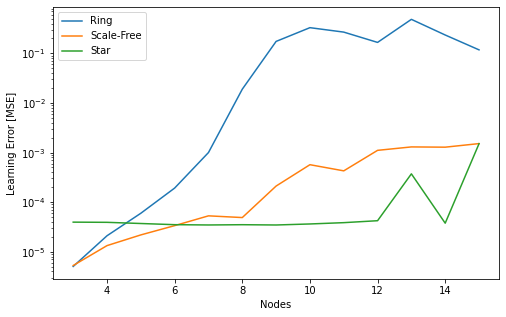

In [15]:
plt.figure(figsize=(8, 5))

plt.yscale('log')

plt.plot(x, y1, label='Ring')
plt.plot(x, y2, label='Scale-Free')
plt.plot(x, y3, label='Star')

plt.xlabel('Nodes')
plt.ylabel('Learning Error [MSE]')

plt.legend()
plt.savefig('../plots/02.2_error_x_topologysize_2hn.png')

## Checking intervals

In [16]:
np.max(np.array(X))

0.283428

In [17]:
cols = ['x_max', 'x_mean', 'x_std', 'y_max', 'y_mean', 'y_std']
final_cols = []
for top in ['ring', 'scale', 'star']:
    for col in cols:
        final_cols.append(f'{top}_{col}')
final_cols

['ring_x_max',
 'ring_x_mean',
 'ring_x_std',
 'ring_y_max',
 'ring_y_mean',
 'ring_y_std',
 'scale_x_max',
 'scale_x_mean',
 'scale_x_std',
 'scale_y_max',
 'scale_y_mean',
 'scale_y_std',
 'star_x_max',
 'star_x_mean',
 'star_x_std',
 'star_y_max',
 'star_y_mean',
 'star_y_std']

In [18]:
max_mean = pd.DataFrame(columns=final_cols)
all_data = {}
for i, file in enumerate(ring_files):
    n2 = (i + 3) ** 2
    all_data['ring'] = pd.read_table(file, sep=' ', header=None)
    all_data['scale'] = pd.read_table(scale_files[i], sep=' ', header=None)
    all_data['star'] = pd.read_table(star_files[i], sep=' ', header=None)
    row = list()
    for top in ['ring', 'scale', 'star']:
        X = all_data[top].iloc[:, :n2]
        y = all_data[top].iloc[:, n2:n2*2]
        x_max = np.max(np.array(X))
        x_mean = np.mean(np.array(X))
        x_std = np.std(np.array(X))
        y_max = np.max(np.array(y))
        y_mean = np.mean(np.array(y))
        y_std = np.std(np.array(y))
        row += [x_max, x_mean, x_std, y_max, y_mean, y_std]
    max_mean.loc[i] = row
max_mean    

,ring_x_max,ring_x_mean,ring_x_std,ring_y_max,ring_y_mean,ring_y_std,scale_x_max,scale_x_mean,scale_x_std,scale_y_max,scale_y_mean,scale_y_std,star_x_max,star_x_mean,star_x_std,star_y_max,star_y_mean,star_y_std
0,1.361670,0.489221,0.446618,0.277675,0.118928,0.097354,1.361670,0.489232,0.447103,0.111877,0.070219,0.049705,1.361670,0.489221,0.446618,0.246362,0.148443,0.105147
1,1.024600,0.413305,0.328256,0.495337,0.198123,0.148348,1.031700,0.413067,0.328267,0.244192,0.109563,0.078432,1.024600,0.413305,0.328256,0.253728,0.169682,0.098159
2,0.826952,0.352426,0.256466,0.808518,0.297626,0.212055,0.826952,0.352275,0.256410,0.253743,0.134230,0.084674,0.826952,0.352426,0.256466,0.257258,0.182718,0.091553
3,0.691341,0.306003,0.209344,1.322770,0.429720,0.297360,0.691341,0.305644,0.209211,0.386951,0.164951,0.103834,0.691341,0.306003,0.209344,0.259662,0.191569,0.085866
4,0.597357,0.269612,0.176232,2.289640,0.621108,0.424882,0.597357,0.269316,0.176126,0.530115,0.189994,0.125078,0.597357,0.269612,0.176232,0.259475,0.197929,0.080997
5,0.520738,0.240721,0.151952,8.221960,0.984794,0.716060,0.525777,0.240496,0.151841,0.415176,0.199580,0.111490,0.520738,0.240721,0.151952,0.258718,0.202745,0.076823
6,0.466436,0.217357,0.133339,18.744300,2.101262,1.830016,0.466436,0.217216,0.133272,0.410505,0.199381,0.108792,0.466436,0.217357,0.133339,0.259931,0.206522,0.073210
7,0.421877,0.198034,0.118713,26.409200,5.282756,4.237846,0.421877,0.197958,0.118661,0.394180,0.208106,0.107655,0.421877,0.198034,0.118713,0.257362,0.209552,0.070045
8,0.382948,0.181758,0.106929,30.996300,9.938024,6.857156,0.382948,0.181761,0.106877,0.586528,0.256444,0.136267,0.382948,0.181758,0.106929,0.259483,0.212027,0.067245
9,0.350403,0.167998,0.097252,35.907800,14.320867,9.237341,0.355876,0.167996,0.097204,0.398098,0.202632,0.089442,0.350403,0.167998,0.097252,0.259968,0.214114,0.064757
